In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")

In [3]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [4]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [5]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [5]:
independent=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]
dependent=dataset[['charges']]

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [16]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [17]:
x_train

array([[-1.5330973 , -0.40713453, -0.89833872, -0.97676557, -0.50466988],
       [-0.03364163,  0.32855417, -0.89833872, -0.97676557, -0.50466988],
       [ 0.89459283,  2.56690911,  3.25603402, -0.97676557, -0.50466988],
       ...,
       [ 0.03776102, -0.91016269, -0.89833872,  1.02378711, -0.50466988],
       [-1.46169465,  0.76659782, -0.89833872,  1.02378711, -0.50466988],
       [-0.46205754, -1.96596021, -0.06746417, -0.97676557, -0.50466988]])

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
regressor=DecisionTreeRegressor(criterion='squared_error',splitter='best')
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [62]:
import matplotlib.pyplot as pt
from sklearn import tree

[Text(0.6533233287096276, 0.9772727272727273, 'x[4] <= 0.738\nsquared_error = 140986233.214\nsamples = 936\nvalue = 13232.916'),
 Text(0.4143376357696494, 0.9318181818181818, 'x[0] <= 0.216\nsquared_error = 37737689.841\nsamples = 746\nvalue = 8616.732'),
 Text(0.21986375694934698, 0.8863636363636364, 'x[0] <= -0.926\nsquared_error = 22225839.786\nsamples = 407\nvalue = 5418.786'),
 Text(0.1418144781739028, 0.8409090909090909, 'x[2] <= 2.01\nsquared_error = 21407144.881\nsamples = 177\nvalue = 3657.79'),
 Text(0.1076082480291799, 0.7954545454545454, 'x[0] <= -1.212\nsquared_error = 19404317.899\nsamples = 172\nvalue = 3507.23'),
 Text(0.0696993763972232, 0.75, 'x[1] <= -0.128\nsquared_error = 17041016.514\nsamples = 120\nvalue = 3064.763'),
 Text(0.04441699023414519, 0.7045454545454546, 'x[2] <= -0.483\nsquared_error = 1756297.11\nsamples = 61\nvalue = 2251.492'),
 Text(0.026591363689845864, 0.6590909090909091, 'x[0] <= -1.426\nsquared_error = 120753.247\nsamples = 41\nvalue = 1825.543

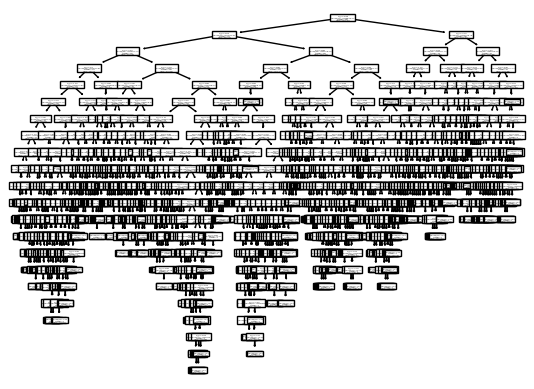

In [63]:
tree.plot_tree(regressor)

In [11]:
pt.show()

In [64]:
y_pred=regressor.predict(x_test)

In [65]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [66]:
r_score

0.7002760969353239